## Exercise 1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img_plt(img, fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img, vmin=vmin, vmax=vmax)

def show_mult_img_plt(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

def show_mult_img_plt_cmap(rows, columns, img_names,cmap='gray', vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i],cmap=cmap, vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

def show_img_plt_cmap(img,cmap='gray', fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img,cmap, vmin=vmin, vmax=vmax)

In [129]:
org_img = cv2.imread('clock.png', cv2.IMREAD_GRAYSCALE)

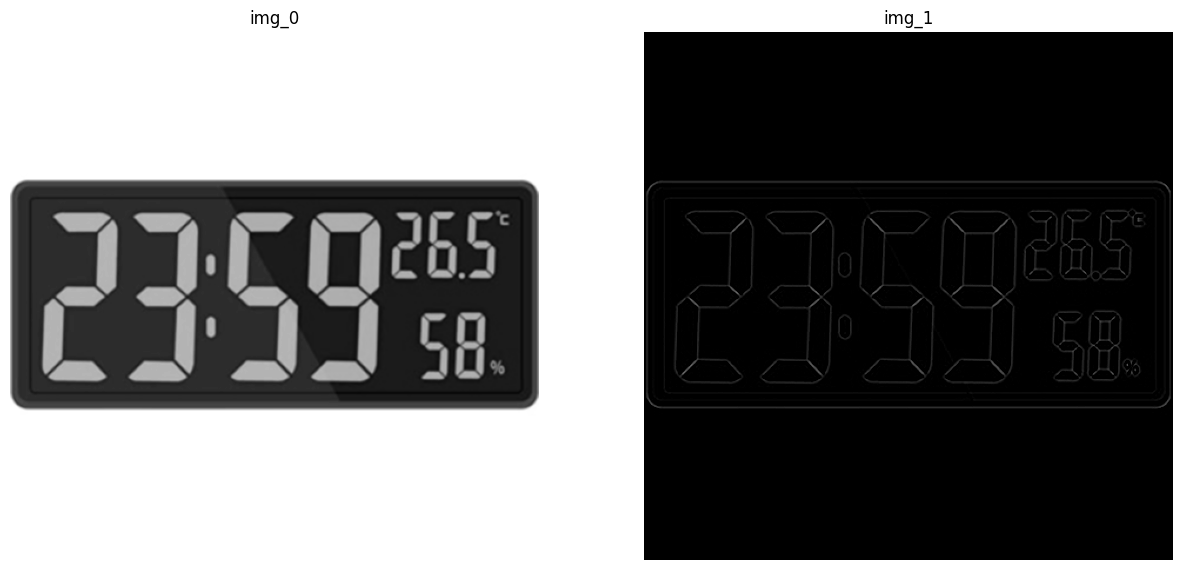

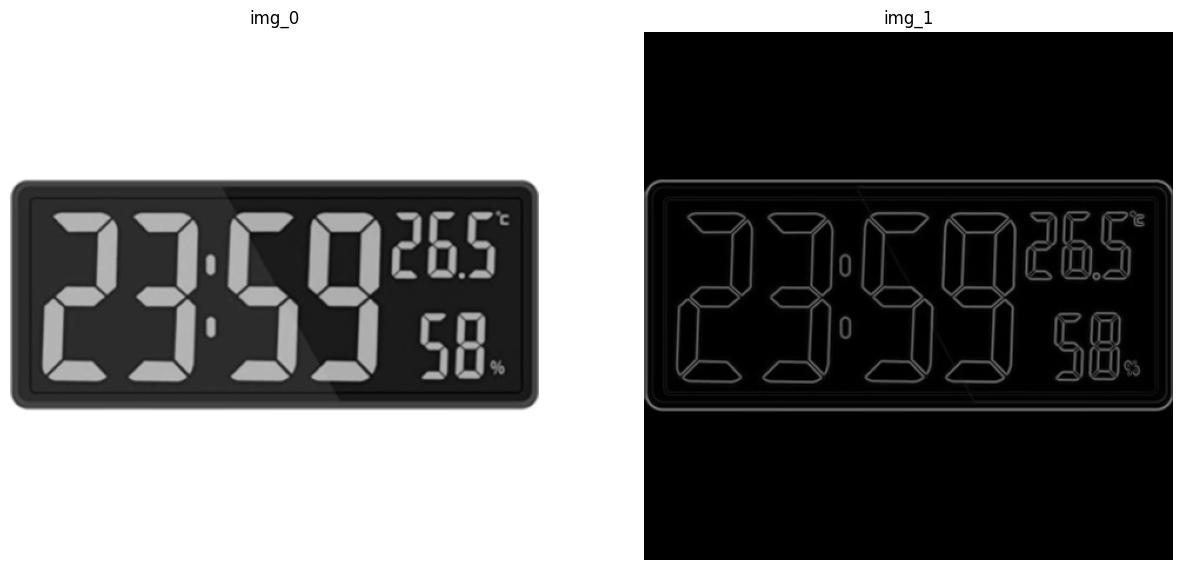

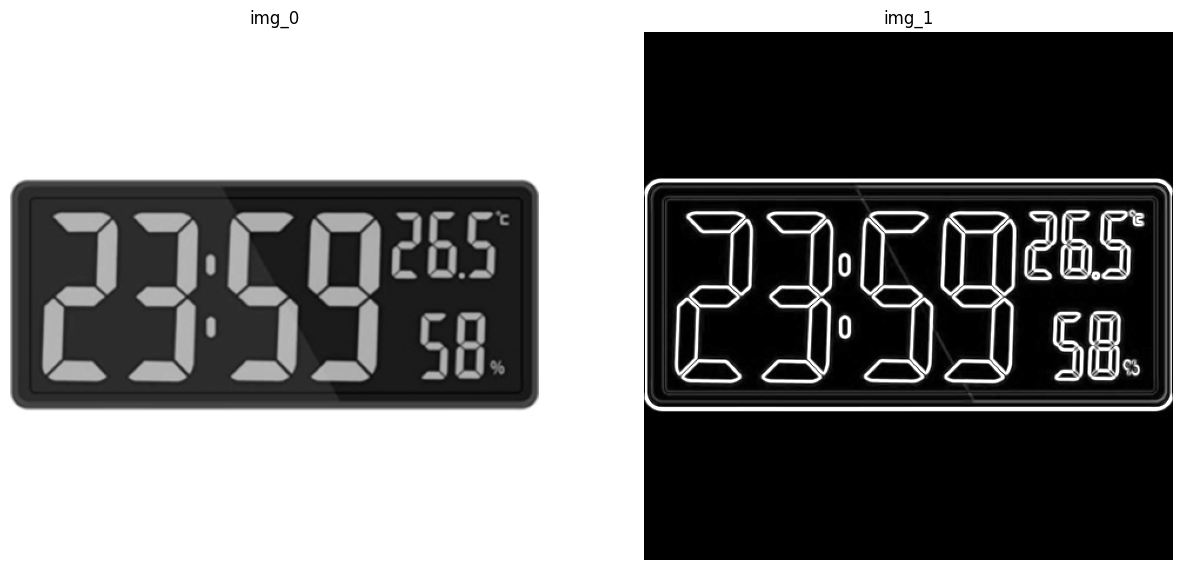

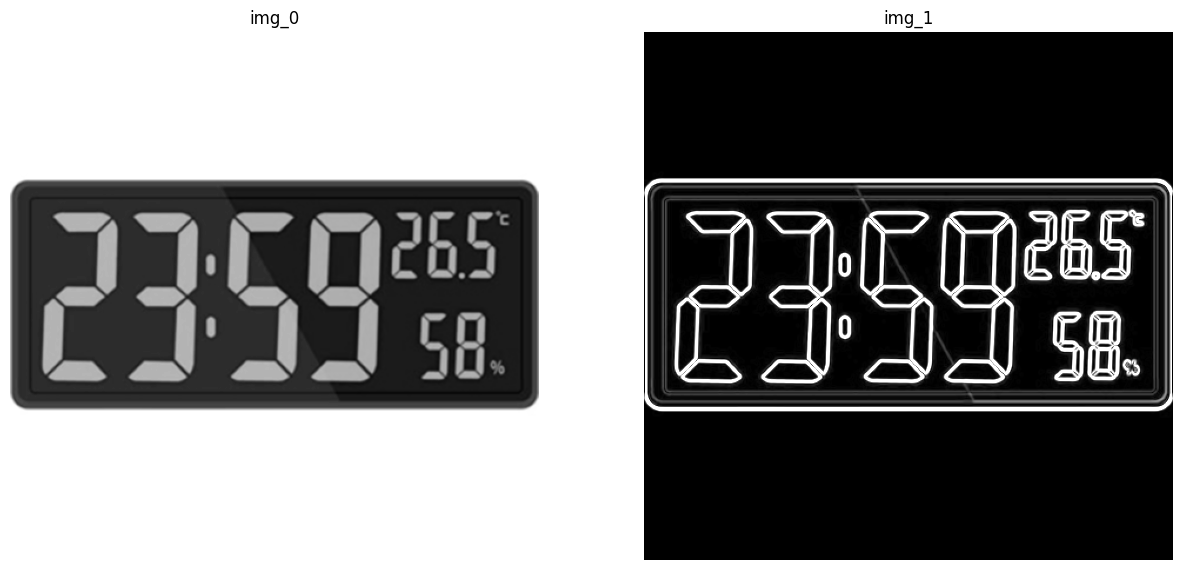

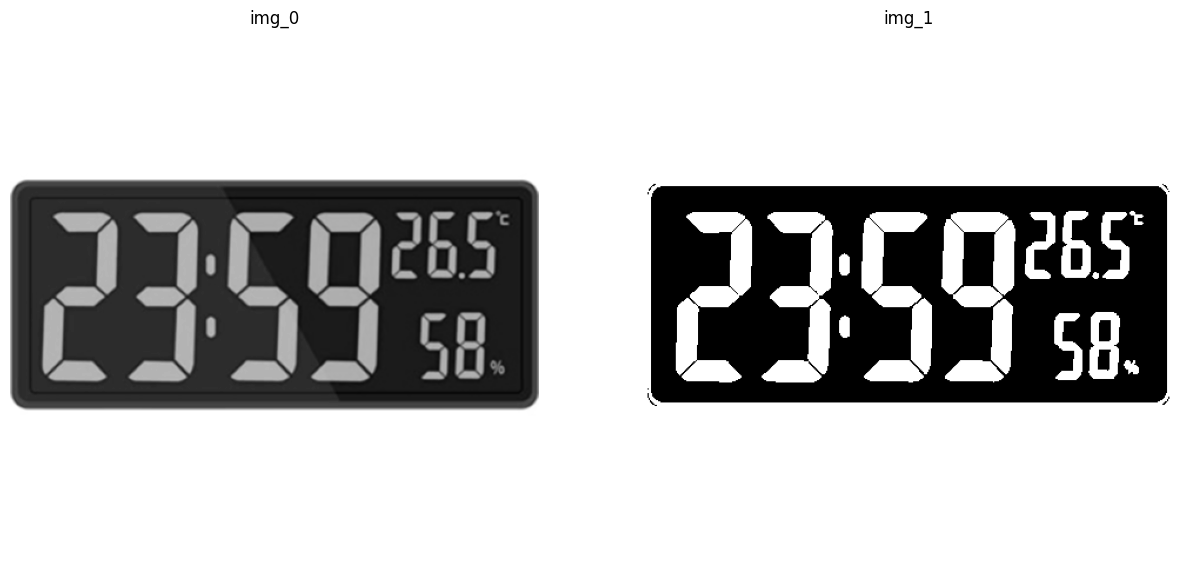

In [139]:
median_img_output = cv2.medianBlur(org_img, 1)
blur_img_output = cv2.GaussianBlur(median_img_output, (3, 3), 0)
blur_img_output = np.float32(blur_img_output)
# laplacian method
laplacian_blur_img = cv2.Laplacian(blur_img_output, -1 , ksize=1)
show_mult_img_plt_cmap(1, 2, [blur_img_output,laplacian_blur_img])

# Robert kernel method
robert_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
robert_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

robert_x_edge_2 = cv2.filter2D(blur_img_output, -1, robert_kernel_x)
robert_y_edge_2 = cv2.filter2D(blur_img_output, -1, robert_kernel_y)
robert_xy_edge = np.sqrt(np.square(robert_x_edge_2) + np.square(robert_y_edge_2))
show_mult_img_plt_cmap(1, 2, (blur_img_output, robert_xy_edge))

# Prewitt kernel method -> the best method is these method. but in this method we still have the diagonal line
prewitt_x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = np.float32)
prewitt_y_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype = np.float32)

prewitt_x_edge = cv2.filter2D(blur_img_output, -1, prewitt_x_kernel)
prewitt_y_edge = cv2.filter2D(blur_img_output, -1, prewitt_y_kernel)
prewitt_xy_edge = np.sqrt(np.square(prewitt_x_edge) + np.square(prewitt_y_edge))
show_mult_img_plt_cmap(1, 2, (blur_img_output, prewitt_xy_edge))


# Sobel kernel method
sobel_x = cv2.Sobel(blur_img_output, cv2.CV_64F, 1, 0, ksize = 3)
sobel_y = cv2.Sobel(blur_img_output, cv2.CV_64F, 0, 1, ksize = 3)

sobel_xy = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
show_mult_img_plt_cmap(1, 2, (blur_img_output, sobel_xy))

# threshold method
threshold_value = 60
_, thresh = cv2.threshold(blur_img_output, threshold_value, 255, cv2.THRESH_BINARY )
show_mult_img_plt_cmap(1, 2, (blur_img_output, thresh))

## This part is my tests for each method and has not been deleted due to the comparison of methods

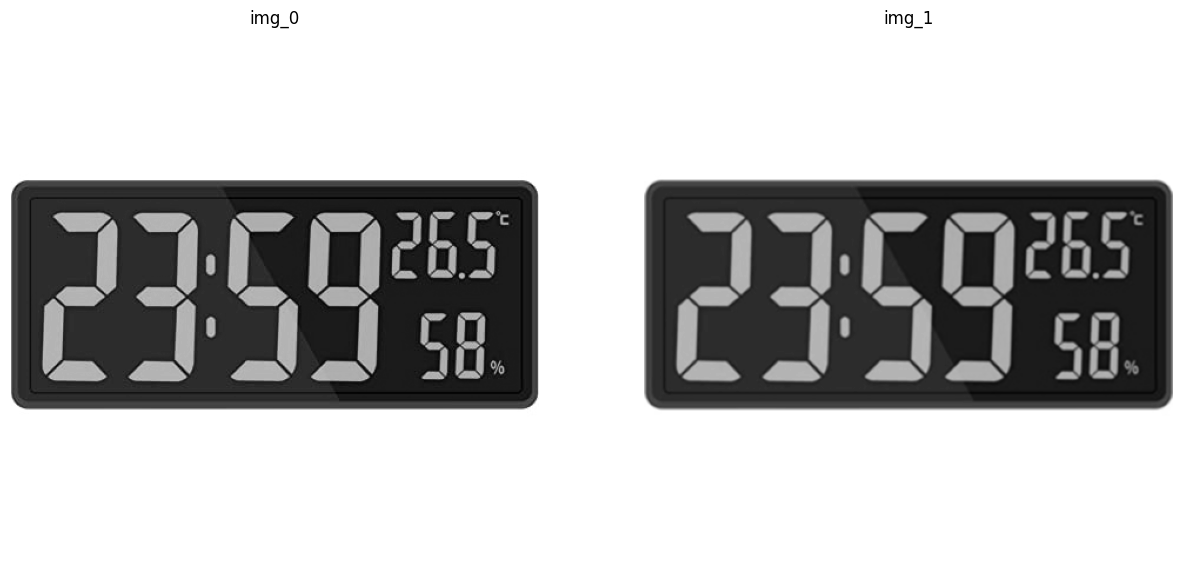

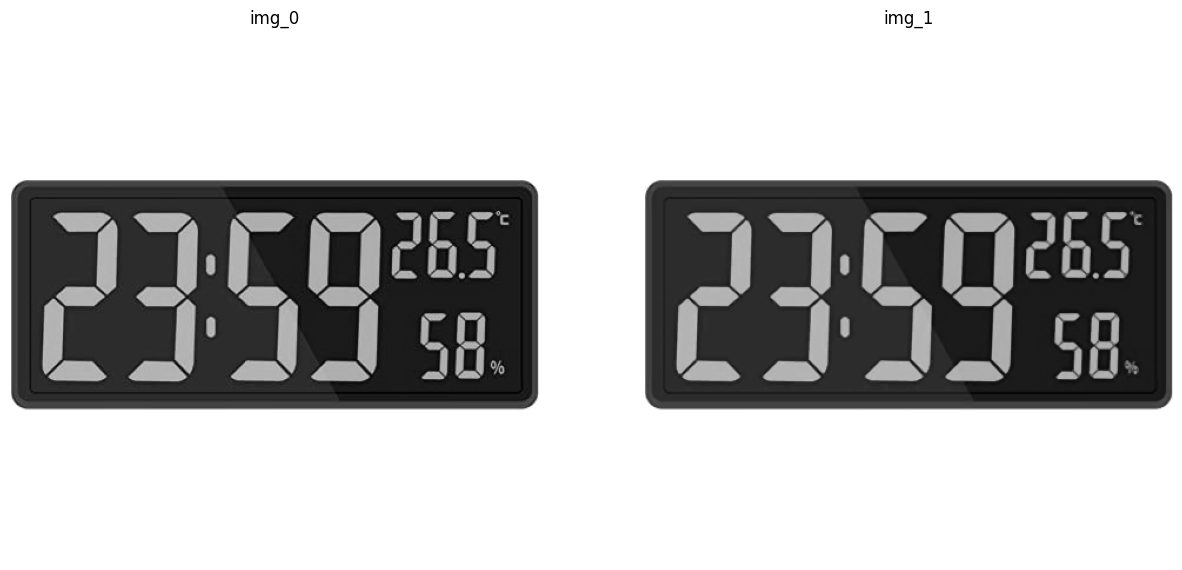

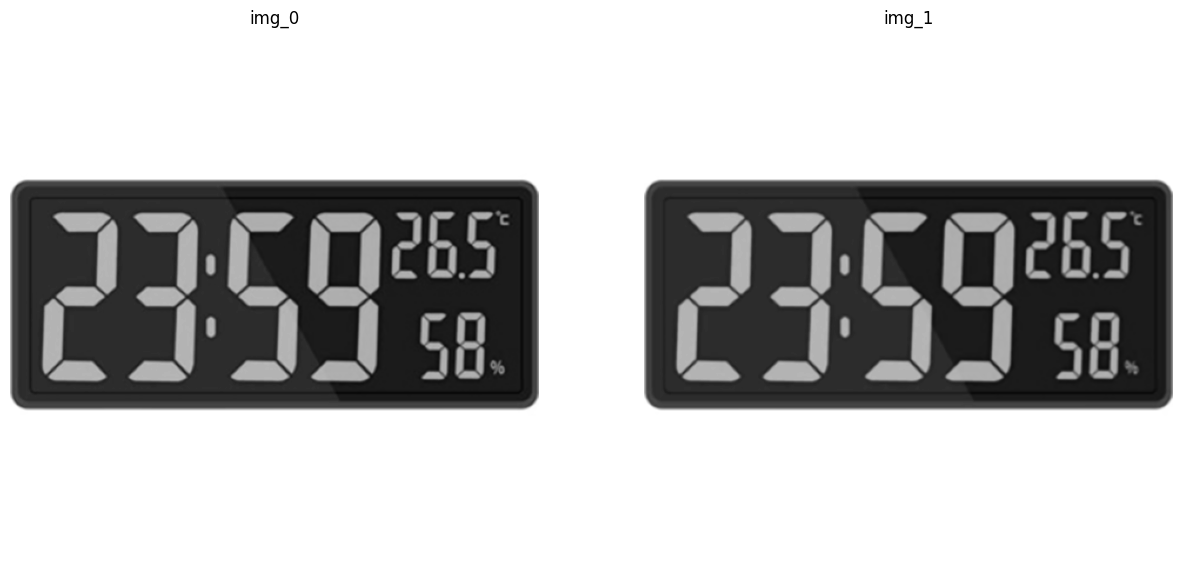

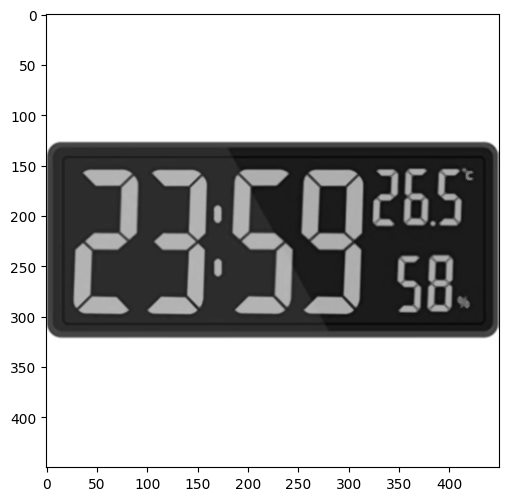

In [110]:
org_img = cv2.imread('clock.png', cv2.IMREAD_GRAYSCALE)

convolved_img_gaussian = cv2.GaussianBlur(org_img, (1, 1), 0)
convolved_img_gaussian2 = cv2.GaussianBlur(org_img, (3, 3), 0)
median_img_output = cv2.medianBlur(org_img, 1)
median_img_output2 = cv2.medianBlur(org_img, 3)
blur_img_output = cv2.blur(org_img, (3, 3))
blur_img_output2 = cv2.blur(org_img, (5, 5))

final = cv2.medianBlur(convolved_img_gaussian2, 3)
blur_img_output = cv2.GaussianBlur(median_img_output, (3, 3), 0) # important
blur_img_output2 = cv2.GaussianBlur(median_img_output2, (3, 3), 0)


# show_mult_img_plt_cmap(1, 2, [convolved_img_gaussian, convolved_img_gaussian2])
# show_mult_img_plt_cmap(1, 2, [median_img_output, median_img_output2])
show_mult_img_plt_cmap(1, 2, [blur_img_output, blur_img_output2])
# show_img_plt_cmap(final)

In [111]:
convolved_img_gaussian = np.float32(convolved_img_gaussian)
convolved_img_gaussian2 = np.float32(convolved_img_gaussian2)
median_img_output = np.float32(median_img_output)
median_img_output = np.float32(median_img_output)
blur_img_output = np.float32(blur_img_output)
blur_img_output2 = np.float32(blur_img_output2)
final = np.float32(final)

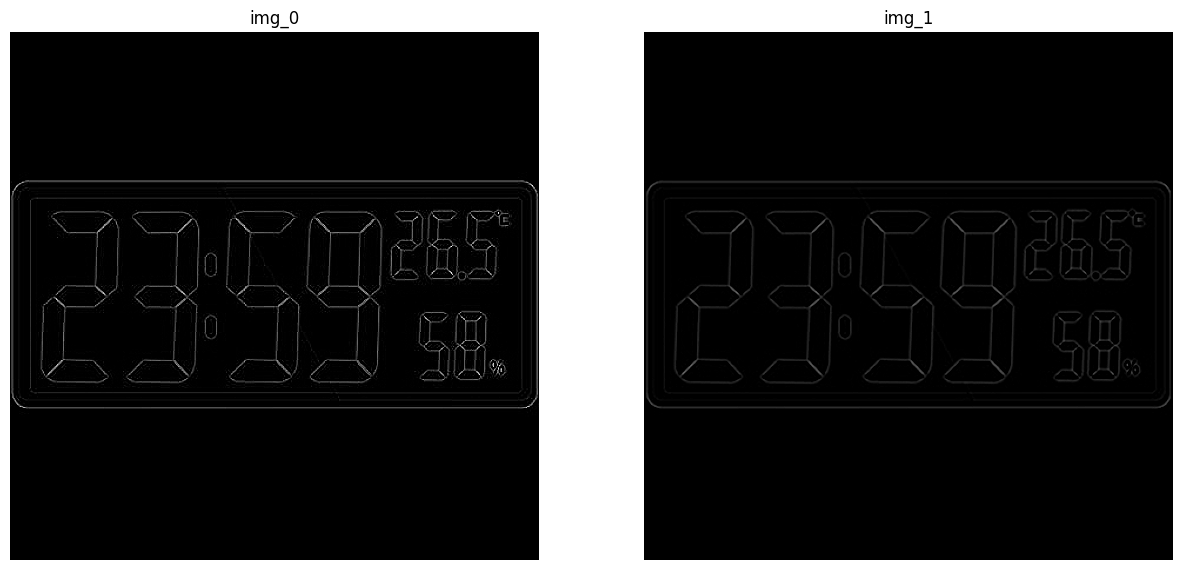

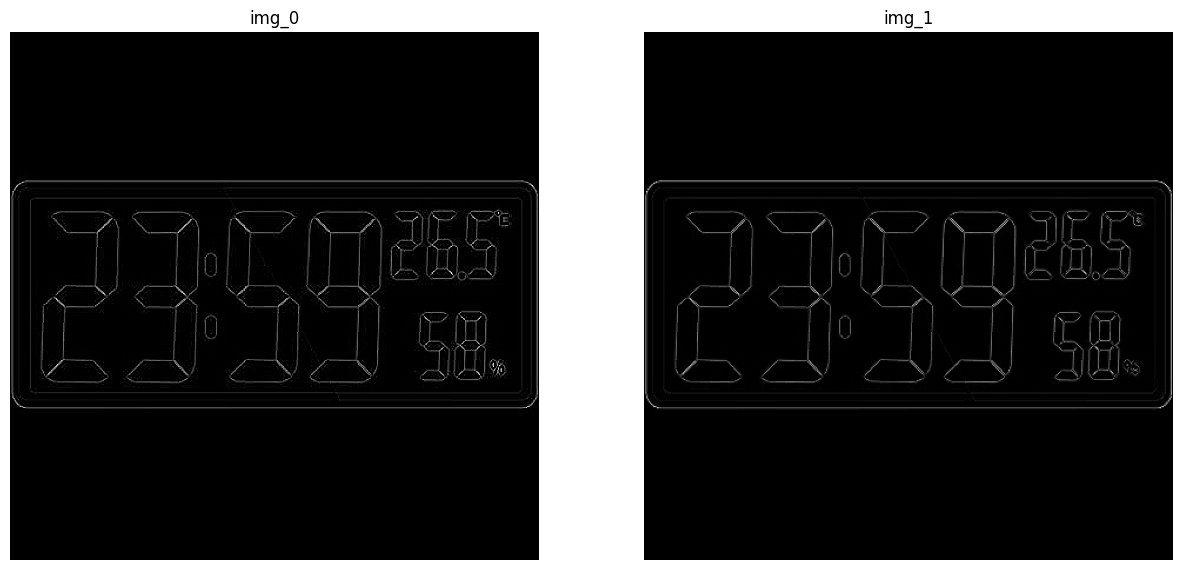

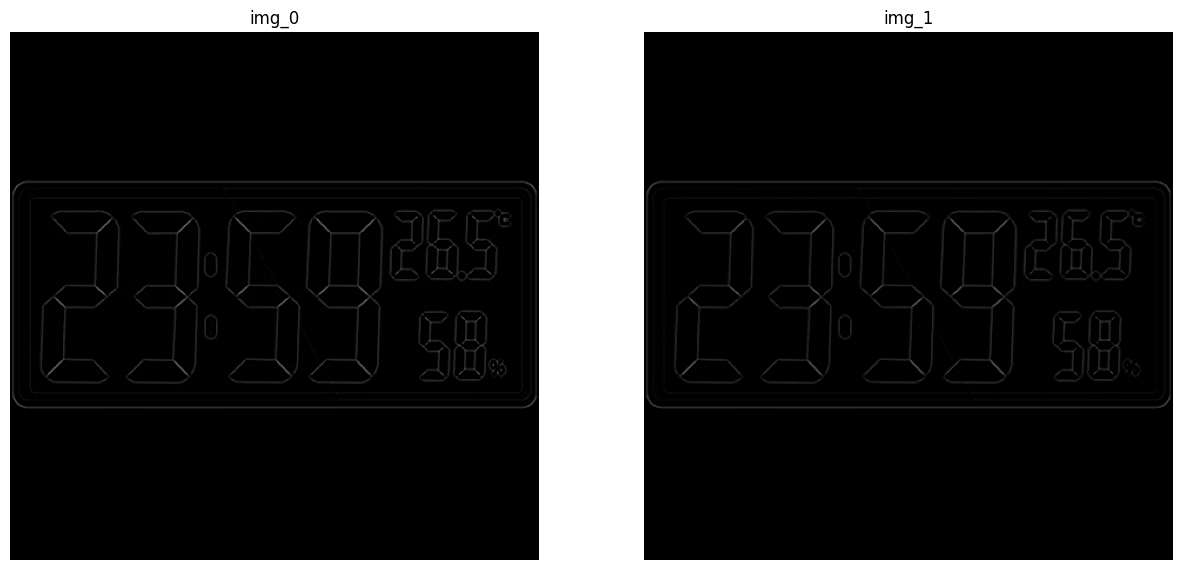

In [130]:
laplacian_img_gaussian = cv2.Laplacian(convolved_img_gaussian, -1, ksize = 1)
laplacian_img_gaussian2 = cv2.Laplacian(convolved_img_gaussian2, -1, ksize = 1)
laplacian_img_median = cv2.Laplacian(median_img_output, -1, ksize = 1)
laplacian_img_median2 = cv2.Laplacian(median_img_output2, -1, ksize = 1)
laplacian_blur_img = cv2.Laplacian(blur_img_output, -1 , ksize=1)
laplacian_blur_img2 = cv2.Laplacian(blur_img_output2, -1 , ksize=1)
show_mult_img_plt_cmap(1, 2, [laplacian_img_gaussian, laplacian_img_gaussian2])
show_mult_img_plt_cmap(1, 2, [laplacian_img_median, laplacian_img_median2])
show_mult_img_plt_cmap(1, 2, [laplacian_blur_img, laplacian_blur_img2])

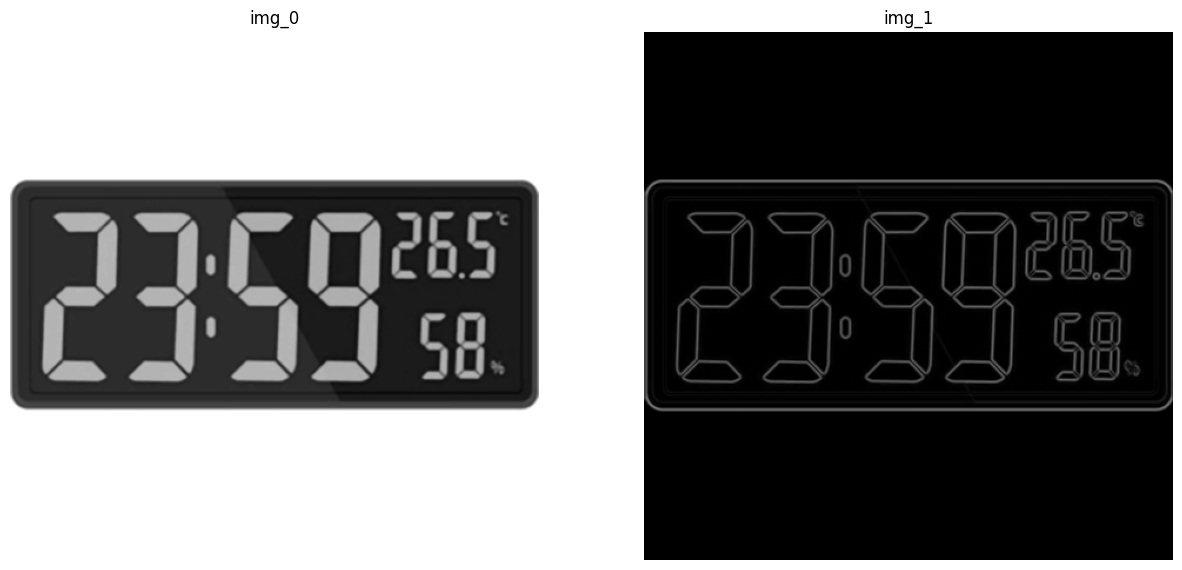

In [125]:
#robert kernel
robert_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
robert_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

robert_x_edge_2 = cv2.filter2D(blur_img_output2, -1, robert_kernel_x)
robert_y_edge_2 = cv2.filter2D(blur_img_output2, -1, robert_kernel_y)
robert_xy_edge = np.sqrt(np.square(robert_x_edge_2) + np.square(robert_y_edge_2))
show_mult_img_plt_cmap(1, 2, (blur_img_output2, robert_xy_edge))

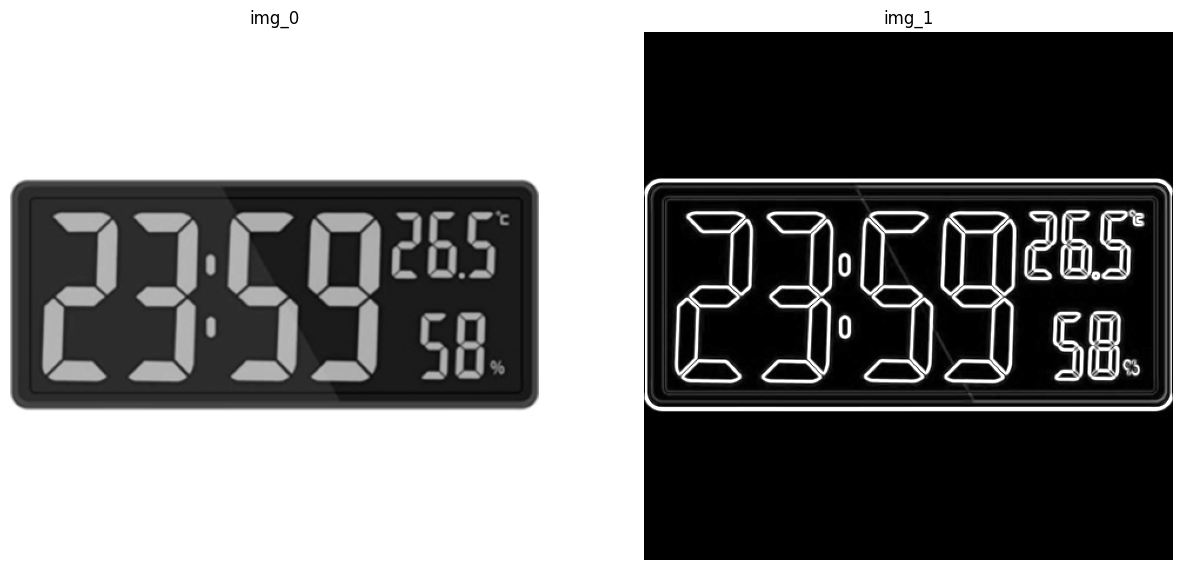

In [126]:
prewitt_x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = np.float32)
prewitt_y_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype = np.float32)

prewitt_x_edge = cv2.filter2D(blur_img_output, -1, prewitt_x_kernel)
prewitt_y_edge = cv2.filter2D(blur_img_output, -1, prewitt_y_kernel)

prewitt_xy_edge = np.sqrt(np.square(prewitt_x_edge) + np.square(prewitt_y_edge))

show_mult_img_plt_cmap(1, 2, (blur_img_output, prewitt_xy_edge))

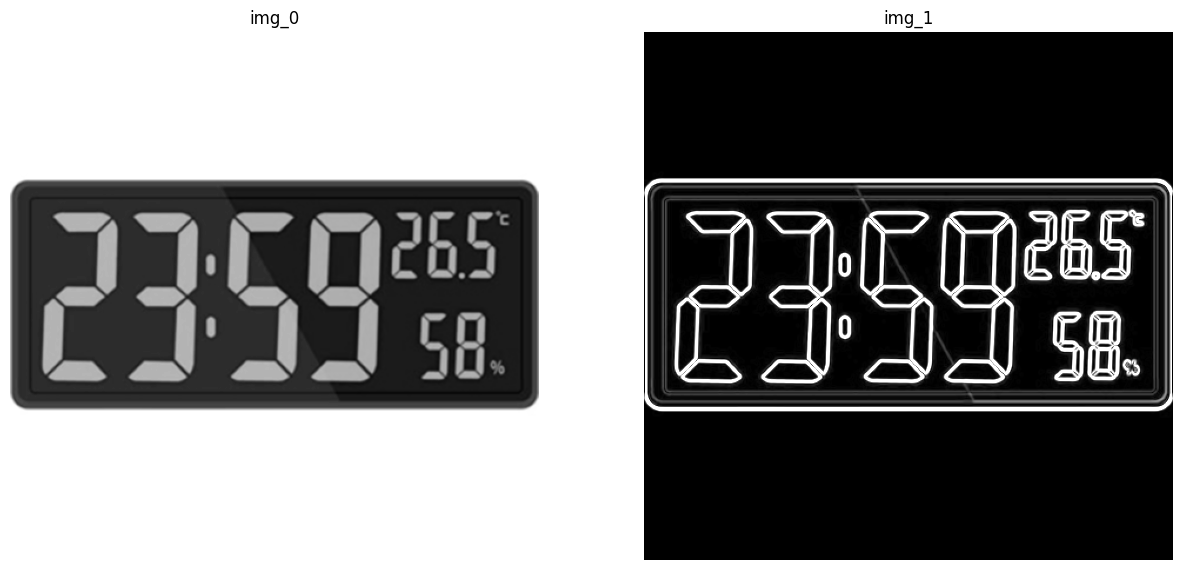

In [127]:
#sobel
sobel_x = cv2.Sobel(blur_img_output, cv2.CV_64F, 1, 0, ksize = 3)
sobel_y = cv2.Sobel(blur_img_output, cv2.CV_64F, 0, 1, ksize = 3)

sobel_xy = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

show_mult_img_plt_cmap(1, 2, (blur_img_output, sobel_xy))

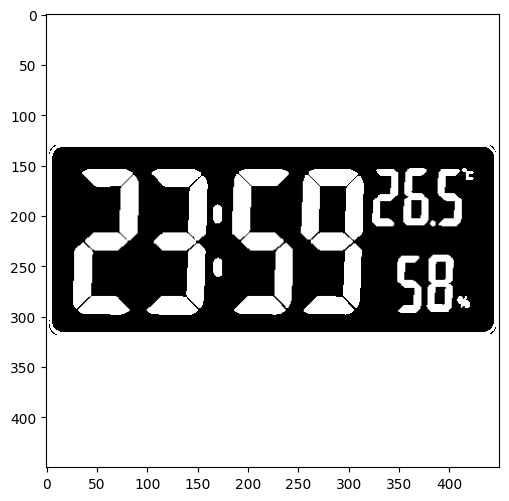

In [128]:
threshold_value = 60
_, thresh = cv2.threshold(blur_img_output, threshold_value, 255, cv2.THRESH_BINARY )
show_img_plt_cmap(thresh)